<a href="https://colab.research.google.com/github/laxmena/100MLProjects/blob/master/Project3%20-%20Implementing%20Regression%20Algorithms%20from%20Scratch%5C3_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Implementing Linear Regression 
### Challenge 3: [Implementating Regression Algorithms from Scratch]((https://medium.com/@laxmena/project-3-announcement-implementing-regression-algorithms-from-scratch-100mlprojects-laxmena-cbb508652038)

This project is a part of #100MLProjects

**Objective:**
 *To understand how Regression Algorithms are built, and learn the underlying mechanics of the algorithms by building the Algorithms from Scratch.*

 ----


**Note:** This is a Fair Draft of the Project, you can find my worsheet here -> [Linear Regression Worksheet](https://github.com/laxmena/100MLProjects/blob/master/Project3%20-%20Implementing%20Regression%20Algorithms%20from%20Scratch/Worksheets/Linear_Regression_Worksheet.ipynb). 

This worksheet is where I tested, failed, experimented and tweaked a lot to derive to this result.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
dataset = pd.read_csv('iris.data', header=None)

### Selecting features with Linear Relations

Linear Regression Model is best used to approximate data that has linear correlation between them. So by visualizing the dataset, I can select the features that are highly correlated to each other.

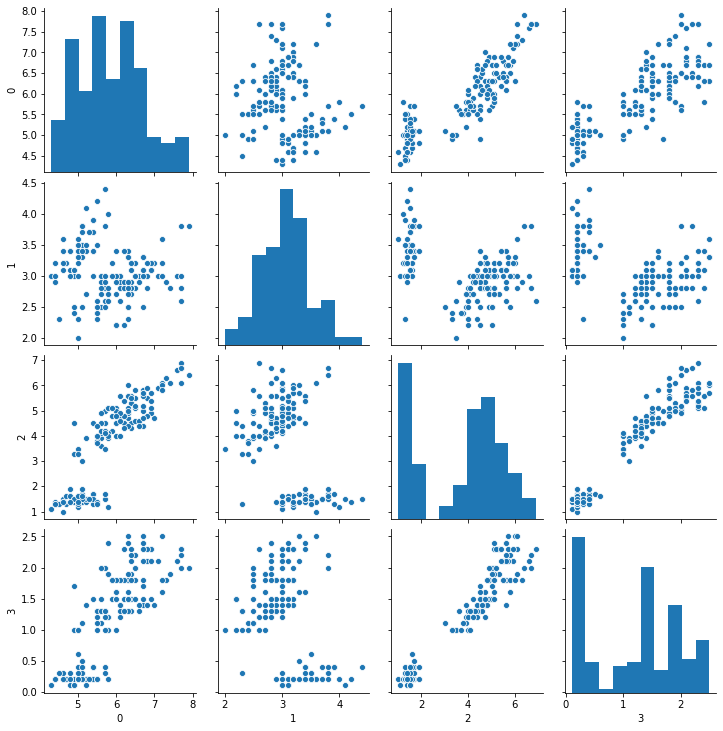

In [37]:
import seaborn as sns
df = dataset.iloc[:]
sns.pairplot(df)

- From the visualization, it is visible that **Petal-Length(Column 2)** and **Petal-Width(Row 3)** has a positive linear correlation between each other. 

- If the petal length increases, the petal width increases too.

- So, I'll select Petal-Length and Petal-Width to build a linear model that represents the data, and try to predict Petal-Width based on Petal-Length.

In [6]:
X = dataset.iloc[:,[2]].values
y = dataset.iloc[:,3].values

In [38]:
# Splitting the dataset into train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Implementing Sklearn Linear Regression

Idea of this project is to build regression models from scratch that performs **on par with** or **better than** the Sklearn models.

So, I'm building a model with SciKit-Learn's LinearRegression implementation, so I can compare the performance with the model that I'm going to build. 

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Coeff: ", lr.coef_)
print("Intercept: {:.4f}".format(lr.intercept_))
print("R2 Score: {:.4f}".format(r2_score(y_test, y_pred)))

Coeff:  [0.42045324]
Intercept: -0.3739
R2 Score: 0.8925


I'm considering R2 Score as the primary means of comparing the performance of the two Linear models.

*(Note to other beginners: Abstractly, if R2 score is closer to 1, the model is considered to be a good model)*

### R2 Score of SKLearn LinearRegression = 0.8925

### Visualizing the Data and the Linear Model

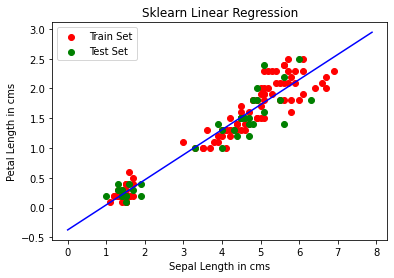

In [34]:
plt.scatter(X_train, y_train, color='red',label="Train Set")
plt.scatter(X_test, y_test, color='green',label="Test Set")
xx = np.arange(start=X.min()-1, stop=X.max()+1, step=0.01)
plt.plot(xx, lr.predict(xx.reshape(len(xx), 1)), color='blue')
plt.xlabel("Sepal Length in cms")
plt.ylabel("Petal Length in cms")
plt.title("Sklearn Linear Regression")
plt.legend()
plt.show()

## Building Linear Regression from Scratch

This is the part where I build my own Linear Regression model from scratch. 


I used the following resources to understand and learn the math behind Linear Regression models.

- KhanAcademy: [Statistics-Probability](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data)
- Yale: [Stat101 - Linear Regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)
- MachineLearning Mastery - [Linear Regression for Machine Learning](https://machinelearningmastery.com/linear-regression-for-machine-learning/)
- OnlineStatBook - [Introduction to Linear Regression](http://onlinestatbook.com/2/regression/intro.html)
- Towards DataScience - [Linear Regression-Detailed View](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
- Edureka YouTube: [Linear Regression Algorithm](https://www.youtube.com/watch?v=E5RjzSK0fvY)
- Towards DataScience: [5 Types of Regressions](https://towardsdatascience.com/5-types-of-regression-and-their-properties-c5e1fa12d55e)

These resources cover extensively on the math behind Linear Regression.
3Blue1Brown YouTube channel also has amazing resources to learn the prerequisites.

In [12]:
class CustomLinearRegression:
  """ Custom Linear Regression Implementation.

  Parameters
  ----------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Number of Epochs or Passes over the training set
  random_state : int
    Random number generator seed for random weight initialization.
  
  Attributes:
  -----------
  w_ : 1D Array
    Array of Bias and Coefficients.
    First element of w_ is the bias, and rest are the coefficients.
  """
  def __init__(self, eta=0.01, n_iter=2000, random_state=123):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    self.w_ = np.array([])

  def add_intercept(self, X):
    return np.c_[np.ones(X.size), X]

  def fit(self, X, y):
    """Fit training data.

    Parameters
    ----------
    X : {array-like}, shape=[n_samples, n_features]
      Training vectors where n_samples is the number of datapoints,
      and n_features is the number of features.
    y : array_like, shape=[n_samples]
      Target Values

    Returns
    -------
    self : object
    """
    X_mod = self.add_intercept(X)
    np.random.seed(self.random_state)
    w_ = np.random.rand(X_mod.shape[1])
    self.w_, cost = self.gradient_descent(X_mod, y, w_)
    return self

  def gradient_descent(self, X, y, w):
    """Compute Gradient Descent.

    Parameters:
    -----------
      X : {array-like}, shape=[n_samples, n_features+1]
      Training vectors where n_samples is the number of datapoints,
      and n_features is the number of features.
    y : array_like, shape=[n_samples]
      Target Values

    Returns:
    --------
    w : {array-like}, shape=[n_features + 1]
      optimized coefficients with bias unit.
    cost: float
      real number that quantifies the error.
    """
    n = y.size
    for _ in range(self.n_iter):
      y_pred = np.dot(X, w)
      error = y_pred - y
      cost = (1/(2*n)) * np.dot(error.T, error)
      w = w - (self.eta * (1/n) * np.dot(X.T, error))
    return w, cost

  def predict(self, X):
    """Make predictions for new datapoint.

    Parameters:
    -----------
    X : {array-like}, shape=[n_samples, n_features]
      Training vectors where n_samples is the number of datapoints,
      and n_features is the number of features.

    Returns:
    --------
    y_pred: {array-like}, shape=[n_samples]
      returns predicted continuous value.
    """
    X = self.add_intercept(X)
    return np.dot(X, self.w_)

In [15]:
clr = CustomLinearRegression()
clr = clr.fit(X_train, y_train)

[0.69646919 0.28613933]
[-0.3417524   0.41346027]


### Comparing CustomLinearRegression with Sklearn LinearRegression

In [27]:
y_pred = clr.predict(X_test)

print("Coeff: ", clr.w_[1:])
print("Intercept: {:.4f}".format(clr.w_[0]))
print("R2 Score: {:.4f}".format(r2_score(y_test, y_pred)))

Coeff:  [0.41346027]
Intercept: -0.3418
R2 Score: 0.8928


### R2 Score of CustomLinearRegression = 0.8928

**Note**: Sklearn LinearRegression's R2 Score = 0.8925

### Conclusion:

Comparing the R2 Scores, the Model built from Scratch - **CustomLinearRegression** has a slightly better performance over the sklearn.linear_model.LinearRegression.

### Visualizing the Data and the Linear Model

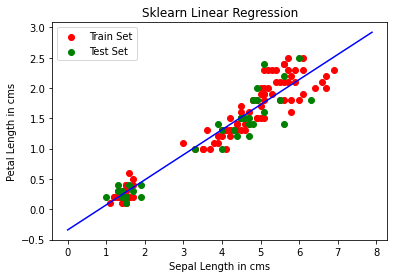

In [33]:
plt.scatter(X_train, y_train, color='red',label="Train Set")
plt.scatter(X_test, y_test, color='green',label="Test Set")
xx = np.arange(start=X.min()-1, stop=X.max()+1, step=0.01)
plt.plot(xx, clr.predict(xx.reshape(len(xx), 1)), color='blue')
plt.xlabel("Sepal Length in cms")
plt.ylabel("Petal Length in cms")
plt.title("Sklearn Linear Regression")
plt.legend()
plt.show()